In [6]:
from helper import *
import pickle
from heuristic import lh_split

In [7]:
dataset = 'ecb'

In [8]:
dataset_folder = f'./datasets/{dataset}/'

In [9]:
mention_map = pickle.load(open(dataset_folder + "/mention_map.pkl", 'rb'))
evt_mention_map = {m_id: m for m_id, m in mention_map.items() if m['men_type'] == 'evt'}

In [10]:
# (tr_tps, tr_fps, tr_tns, tr_fns), mps_t = lh_oracle_split(dataset, 'train', 0.05)
(te_tps, te_fps, te_tns, te_fns), mps_t = lh_split('lh_oracle', dataset, 'test', 0.05)

Generating Similarities: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 93878/93878 [00:00<00:00, 358460.30it/s]


true positives: 5391
false positives: 2397
true negatives: 84883
false negatives: 1207

After transitive closure
true positives: 6562
false positives: 8833
true negatives: 78447
false negatives: 36


In [11]:
(te_tps_lh, te_fps_lh, _, _), mps_t = lh_split('lh', dataset, 'test', 0.05)

Generating Similarities: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 93878/93878 [00:00<00:00, 364490.82it/s]


true positives: 3517
false positives: 2058
true negatives: 85222
false negatives: 3081

After transitive closure
true positives: 4326
false positives: 4676
true negatives: 82604
false negatives: 2272


In [12]:
# lh_oracle_pairs_train  = tr_tps + tr_fps
# all_pairs_train = tr_tps + tr_fps + tr_tns + tr_fns
lh_pairs_test = te_tps_lh + te_fps_lh
lh_oracle_pairs_test = te_tps + te_fps
all_pairs_test = te_tps + te_fps + te_tns + te_fns

In [13]:
m_id2topic = {m_id: evt_mention_map[m_id]['predicted_topic'] if evt_mention_map[m_id]['predicted_topic'] else evt_mention_map[m_id]['topic'] for m_id in evt_mention_map if evt_mention_map[m_id]['split'] == 'test'}

In [14]:
from collections import Counter, defaultdict


topic_freqs = Counter(m_id2topic.values())

In [15]:
topic_freqs.most_common()

[('predicted_1', 168),
 ('predicted_2', 146),
 ('predicted_8', 145),
 ('predicted_9', 137),
 ('predicted_14', 132),
 ('predicted_11', 121),
 ('predicted_0', 114),
 ('predicted_18', 89),
 ('predicted_5', 86),
 ('predicted_10', 85),
 ('predicted_15', 78),
 ('predicted_16', 69),
 ('predicted_6', 68),
 ('predicted_7', 60),
 ('predicted_17', 56),
 ('predicted_19', 54),
 ('predicted_3', 50),
 ('predicted_4', 44),
 ('predicted_13', 39),
 ('predicted_12', 39)]

In [16]:
topic_freqs.most_common()[::-1]

[('predicted_12', 39),
 ('predicted_13', 39),
 ('predicted_4', 44),
 ('predicted_3', 50),
 ('predicted_19', 54),
 ('predicted_17', 56),
 ('predicted_7', 60),
 ('predicted_6', 68),
 ('predicted_16', 69),
 ('predicted_15', 78),
 ('predicted_10', 85),
 ('predicted_5', 86),
 ('predicted_18', 89),
 ('predicted_0', 114),
 ('predicted_11', 121),
 ('predicted_14', 132),
 ('predicted_9', 137),
 ('predicted_8', 145),
 ('predicted_2', 146),
 ('predicted_1', 168)]

In [17]:
topic2mention_pairs_all_test = defaultdict(list)
for m1, m2 in all_pairs_test:
    topic = evt_mention_map[m1]['predicted_topic']
    topic2mention_pairs_all_test[topic].append((m1,m2))

topic2mention_pairs_lh_oracle_test = defaultdict(list)
for m1, m2 in lh_oracle_pairs_test:
    topic = evt_mention_map[m1]['predicted_topic']
    topic2mention_pairs_lh_oracle_test[topic].append((m1,m2))

topic2mention_pairs_lh_test = defaultdict(list)
for m1, m2 in lh_pairs_test:
    topic = evt_mention_map[m1]['predicted_topic']
    topic2mention_pairs_lh_test[topic].append((m1,m2))

In [18]:
m_counts = [0]
all_pairs_counts = [0]
lh_oracle_pairs_counts = [0]
lh_pairs_counts = [0]

for topic, m_freq in  topic_freqs.most_common()[::-1]:
    m_counts.append(m_counts[-1] + m_freq)
    all_pairs_counts.append(all_pairs_counts[-1] + len(topic2mention_pairs_all_test[topic]))
    lh_pairs_counts.append(lh_pairs_counts[-1] + len(topic2mention_pairs_lh_test[topic]))
    lh_oracle_pairs_counts.append(lh_oracle_pairs_counts[-1] + len(topic2mention_pairs_lh_oracle_test[topic]))

In [19]:
import matplotlib as mpl
mpl.use('pgf')
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('default')
plt.rcParams["figure.figsize"] = (12,10)
plt.rcParams.update({'font.size': 12})
plt.rcParams["pgf.texsystem"] = "pdflatex"
plt.rcParams['text.usetex'] = True
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['grid.color'] = (0.5, 0.5, 0.5, 0.3)
# plt.style.use('default')
# import matplotlib as mpl
# mpl.use('pgf')

In [22]:
plt.rcParams["figure.figsize"] = (4.5,4)
fig, ax = plt.subplots(1, 1)


ax.plot(m_counts[1:], all_pairs_counts[1:], label=r'Previous Methods', color='brown')
ax.plot(m_counts[1:], 5*np.array(m_counts[1:]), label=r'\cite{held-etal-2021-focus}', color='green')

ax.plot(m_counts[1:], lh_oracle_pairs_counts[1:], 
         label=r'{\fontfamily{qcr}\selectfont LH}$_{\mathtt{Oracle}}$+' + r'{\fontfamily{qcr}\selectfont D}',
       color='blue')
ax.plot(m_counts[1:], lh_pairs_counts[1:], 
         label=r'{\fontfamily{qcr}\selectfont LH} +' + r'{\fontfamily{qcr}\selectfont D}',
       color='cyan')

ax.set_yticks([i*10000 for i in range(0, 10)])

ax.set_yticklabels([str(i*10) if i%2==0 else None for i in range(0, 10)])

plt.ylabel(r'Mention Pairs $\times 10^{3}$')
plt.xlabel('Mentions')
plt.grid()
plt.legend()
fig.savefig('test-mention-pairs.pgf', bbox_inches='tight', dpi=75)

Ignoring unknown font: Times New Roman
Ignoring unknown font: Times New Roman
Ignoring unknown font: Times New Roman
Ignoring unknown font: Times New Roman
Ignoring unknown font: Times New Roman
Ignoring unknown font: Times New Roman
Ignoring unknown font: Times New Roman
Ignoring unknown font: Times New Roman
Ignoring unknown font: Times New Roman
Ignoring unknown font: Times New Roman
Ignoring unknown font: Times New Roman
Ignoring unknown font: Times New Roman
Ignoring unknown font: Times New Roman
Ignoring unknown font: Times New Roman
Ignoring unknown font: Times New Roman
Ignoring unknown font: Times New Roman
Ignoring unknown font: Times New Roman
Ignoring unknown font: Times New Roman
Ignoring unknown font: Times New Roman
Ignoring unknown font: Times New Roman
Ignoring unknown font: Times New Roman
Ignoring unknown font: Times New Roman
Ignoring unknown font: Times New Roman
Ignoring unknown font: Times New Roman
Ignoring unknown font: Times New Roman
Ignoring unknown font: Ti

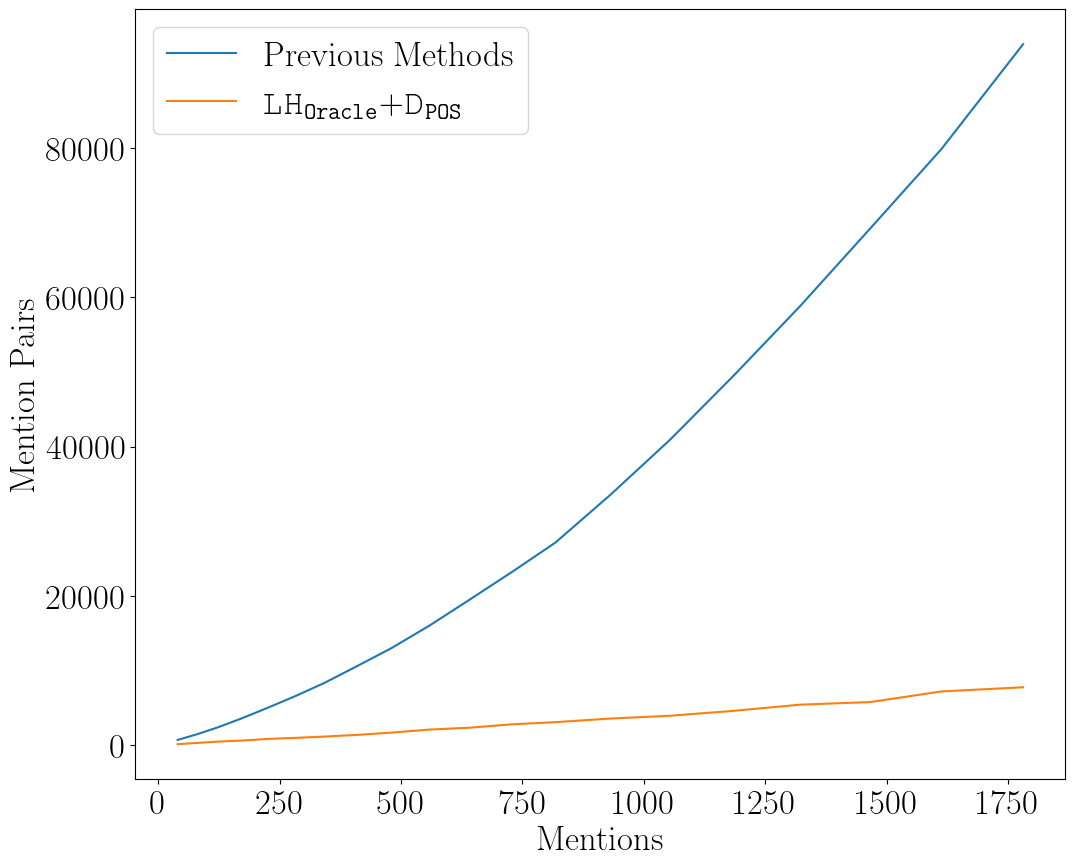

In [83]:
def get_texttt(text):
    return r'{\fontfamily{qcr}\selectfont %s}'%text

plt.plot(m_counts[1:], all_pairs_counts[1:], label=r'Previous Methods')
plt.plot(m_counts[1:], lh_pairs_counts[1:], 
         label=r'{\fontfamily{qcr}\selectfont LH}$_{\mathtt{Oracle}}$+' + r'{\fontfamily{qcr}\selectfont D}$_{\mathtt{POS}}$')

plt.ylabel('Mention Pairs')
plt.xlabel('Mentions')
plt.yticks(0, 20, 40, )
plt.legend()

In [ ]:
lh_pairs_counts